# synthetic Detector Data Analysis
This notebook is aimed to analyse data set which is a mimic of detector measurments of energy and momentum. We will use modern python based data analysis workflow.  

## Dataset description

Each row in the dataset represents one detector event.
The dataset contains 1000 events with the following quantities:

- Energy (GeV), generated from a Gaussian distribution
- Momentum (GeV), generated independently of energy
- Event ID as a simple index


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%capture
!pip install  numpy pandas matplotlib

In [3]:

# TODO: set a random seed (any integer)
np.random.seed(12)

# TODO: number of events
n_events = 10000

# TODO: generate synthetic energy data (Gaussian)
energy = np.random.normal(
    loc= 15,      # mean energy (GeV)
    scale= 10,    # energy resolution (GeV)
    size=n_events
)

# TODO: generate synthetic momentum data (independent)
momentum = np.random.uniform(
    low= 0,      # minimum momentum (GeV)
    high=100,     # maximum momentum (GeV)
    size=n_events
)

# Create DataFrame
df = pd.DataFrame({
    "event_id": np.arange(n_events),
    "energy": energy,
    "momentum": momentum
})

# Display first few rows
df.head()


,event_id,energy,momentum
0,0,19.729858,64.494311
1,1,8.185741,65.204342
2,2,17.424395,88.289916
3,3,-2.007356,74.527579
4,4,22.531428,52.828629


In [4]:
df.describe()

,event_id,energy,momentum
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,14.878503,49.941830
std,2886.89568,9.943057,28.844291
min,0.00000,-25.110492,0.003532
25%,2499.75000,8.075503,24.907234
50%,4999.50000,14.784472,49.717636
75%,7499.25000,21.681986,74.940374
max,9999.00000,53.085663,99.994576


In [5]:
import os
os.makedirs("../data", exist_ok=True)


In [6]:
df.to_csv("../data/detector_data.csv", index=False)


In [7]:
df = pd.read_csv("../data/detector_data.csv")
df.head()


,event_id,energy,momentum
0,0,19.729858,64.494311
1,1,8.185741,65.204342
2,2,17.424395,88.289916
3,3,-2.007356,74.527579
4,4,22.531428,52.828629


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   event_id  10000 non-null  int64  
 1   energy    10000 non-null  float64
 2   momentum  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


,event_id,energy,momentum
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,14.878503,49.941830
std,2886.89568,9.943057,28.844291
min,0.00000,-25.110492,0.003532
25%,2499.75000,8.075503,24.907234
50%,4999.50000,14.784472,49.717636
75%,7499.25000,21.681986,74.940374
max,9999.00000,53.085663,99.994576


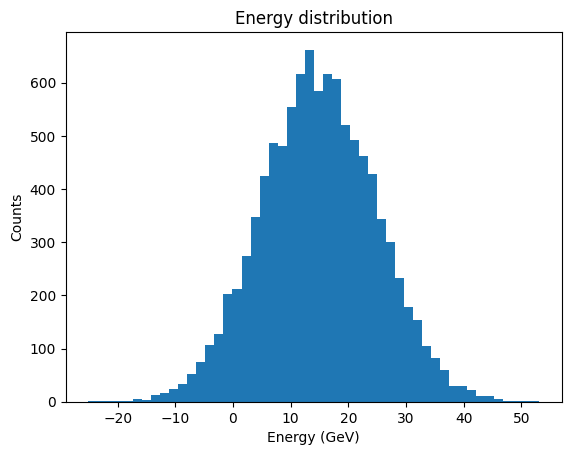

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["energy"], bins=50)
plt.xlabel("Energy (GeV)")
plt.ylabel("Counts")
plt.title("Energy distribution")
plt.show()


## Data cleaning

Due to detector resolution effects, some events have negative measured
energies. Since negative energies are unphysical, these events are
removed from the dataset before further analysis.


In [10]:
df_clean = df[df["energy"] > 0]
len(df), len(df_clean)


(10000, 9327)

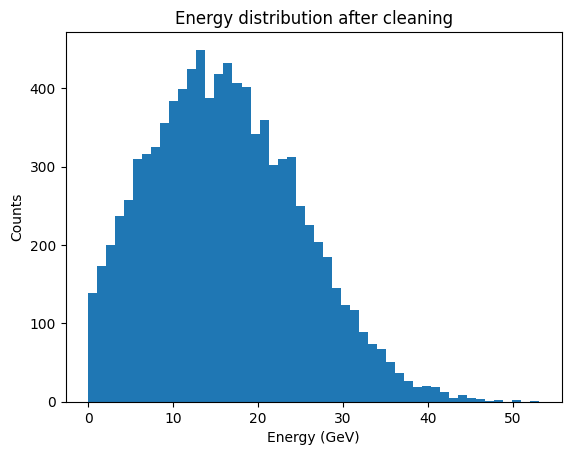

In [11]:
plt.hist(df_clean["energy"], bins=50)
plt.xlabel("Energy (GeV)")
plt.ylabel("Counts")
plt.title("Energy distribution after cleaning")
plt.show()


In [12]:
df_clean = df[df["energy"] > 0]
print(f"Events before cleaning: {len(df)}")
print(f"Events after cleaning: {len(df_clean)}")


Events before cleaning: 10000
Events after cleaning: 9327


After applying the energy selection, the distribution is no longer
strictly Gaussian due to the truncation at zero.


## Momentum distribution

The momentum distribution is examined after applying the energy
selection to ensure consistency with the cleaned dataset.


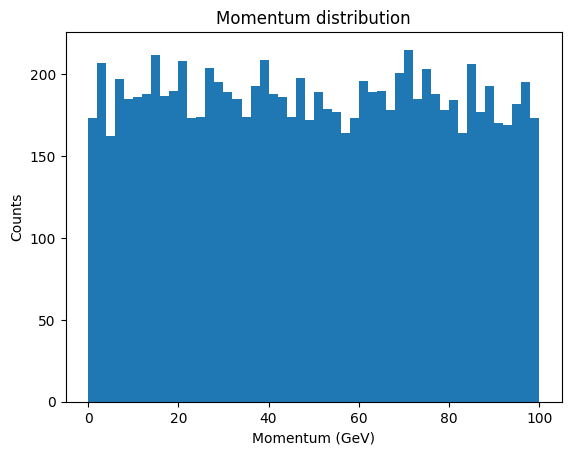

In [13]:
plt.hist(df_clean["momentum"], bins=50)
plt.xlabel("Momentum (GeV)")
plt.ylabel("Counts")
plt.title("Momentum distribution")
plt.show()


## Energy vs momentum

A two-dimensional view helps visualize the relationship between
measured energy and momentum.


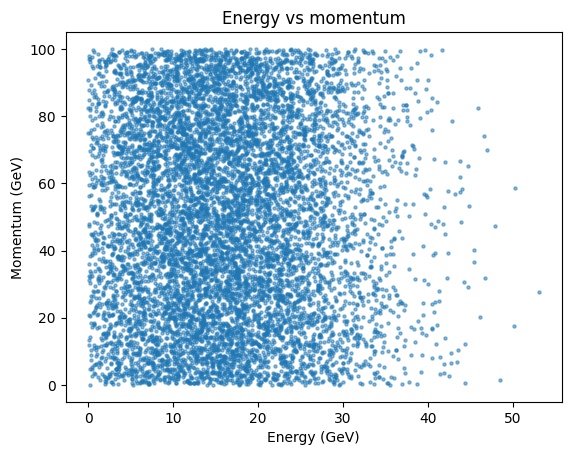

In [14]:
plt.scatter(
    df_clean["energy"],
    df_clean["momentum"],
    s=5,
    alpha=0.5
)
plt.xlabel("Energy (GeV)")
plt.ylabel("Momentum (GeV)")
plt.title("Energy vs momentum")
plt.show()
